In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Prep

In [2]:
df = pd.read_csv("../Phase1/main_data.csv", index_col=0)
df = df.dropna()
df

,# of bumps,# of inflections,curvature,min i,max i,x min,x max,y min,y max,S,criticality
0,3,0,3.255230,38,31,3.663562,3.465736,-11.639162,-10.540549,1.038058,1
1,0,0,1.404121,39,34,3.688879,3.555348,-11.066295,-10.373147,1.039465,1
2,0,0,-7.082191,6,0,1.945910,0.000000,-10.131818,-0.173747,1.063427,1
3,1,0,-8.379891,22,0,3.135494,0.000000,-10.842791,-0.665505,1.044607,1
4,1,0,-13.070105,36,36,3.610918,3.610918,-10.964433,-10.964433,1.041672,1
...,...,...,...,...,...,...,...,...,...,...,...
8793,0,0,-1.873302,59,63,5.823046,6.093570,-8.122181,-7.622121,1.077089,3
8794,0,0,-1.102228,53,65,5.472271,6.297109,-8.539737,-7.719609,1.077744,3
8795,1,0,-0.846527,67,71,7.021976,7.340836,-14.026634,-7.243576,1.106867,3
8796,0,0,-1.016451,66,67,6.200509,6.265301,-14.535209,-13.497222,1.073818,1


In [3]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X = df.drop('criticality', axis=1).values
Y = df['criticality'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=42)
# shuffled_data = shuffle(df.values, random_state=0)
# shuffled_data.shape

# test_index = int(shuffled_data.shape[0] * 0.8)

# X_train, X_test = shuffled_data[:test_index, :-1], shuffled_data[test_index:, :-1]
# Y_train, Y_test = shuffled_data[:test_index, -1], shuffled_data[test_index:, -1]
# shuffled_data.shape
print(X_train.shape, X_test.shape)

(6568, 10) (1643, 10)


## Decision Tree

In [4]:
from sklearn import tree

In [5]:

dt_clf = tree.DecisionTreeClassifier(random_state=0, max_depth=10)
dt_clf.fit(X_train, Y_train)

np.sum(dt_clf.predict(X_test) == Y_test) / len(X_test)

0.9062690200852099

### Validation Curve

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    1.8s finished


(15, 5)


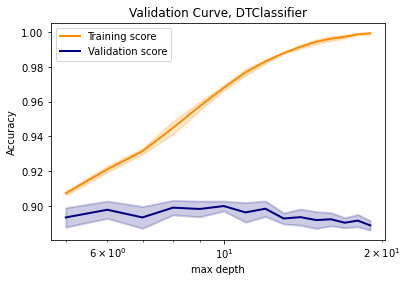

In [23]:
#validation curve
from sklearn.model_selection import validation_curve

max_depth_list = range(5, 20)

train_scores, valid_scores = validation_curve(tree.DecisionTreeClassifier(),  X_train, Y_train, 
                                              param_name="max_depth",
                                              param_range=max_depth_list, 
                                              cv=5, 
                                              scoring = 'accuracy',
                                              verbose=1, n_jobs=-1
                                             )
print(train_scores.shape)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)


xlabel = 'max depth'
ylabel = 'Accuracy'

plt_title = 'Validation Curve, DTClassifier'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
plt.semilogx(max_depth_list, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(max_depth_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(max_depth_list, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(max_depth_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.savefig('results/validation_curve_DT.jpg', bbox_inches='tight', dpi=200)
plt.show()

### Learning Curve

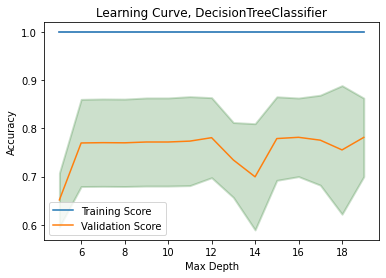

In [22]:
#learning curve
from sklearn.model_selection import learning_curve

max_depth_list = range(5, 20)


ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator = tree.DecisionTreeClassifier(), 
                                                   X = X_train, y = Y_train, 
                                                   train_sizes = max_depth_list, 
                                                   scoring = 'accuracy', 
                                                   n_jobs= -1
                                                   )

train_scores_mean =  train_scores.mean(axis = 1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean =  validation_scores.mean(axis = 1)
validation_scores_std  = validation_scores.std(axis = 1)

xlabel = 'Max Depth'
ylabel = 'Accuracy'

plt_title = 'Learning Curve, DecisionTreeClassifier'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(max_depth_list, train_scores_mean, label = 'Training Score')
ax.plot(max_depth_list, validation_scores_mean, label = 'Validation Score')

plt.fill_between(max_depth_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(max_depth_list, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)
plt.savefig("results/learning_curve_DT.jpg", bbox_inches='tight', dpi=200)
plt.show()

## KNN (Neatest Neighbor Classification)
**This takes a little bit of time**

In [6]:
from sklearn import neighbors
from sklearn.pipeline import Pipeline

print(sorted(neighbors.KDTree.valid_metrics))

['chebyshev', 'cityblock', 'euclidean', 'infinity', 'l1', 'l2', 'manhattan', 'minkowski', 'p']


In [7]:
nca = neighbors.NeighborhoodComponentsAnalysis(random_state=42)
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, Y_train)

Pipeline(steps=[('nca', NeighborhoodComponentsAnalysis(random_state=42)),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [8]:
nca_pipe.score(X_test, Y_test)

0.8922702373706635

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   24.1s finished


(12, 5)


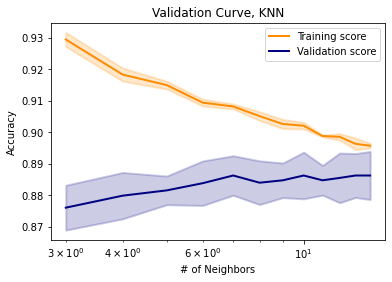

In [24]:
#validation curve
from sklearn.model_selection import validation_curve

n_neighbors_list = range(3, 15)

train_scores, valid_scores = validation_curve(neighbors.KNeighborsClassifier(metric='l1'),  X_train, Y_train, 
                                              param_name="n_neighbors",
                                              param_range=n_neighbors_list, 
                                              cv=5, 
                                              scoring = 'accuracy',
                                              verbose=1, n_jobs=-1
                                             )
print(train_scores.shape)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)


xlabel = '# of Neighbors'
ylabel = 'Accuracy'

plt_title = 'Validation Curve, KNN'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
plt.semilogx(n_neighbors_list, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(n_neighbors_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(n_neighbors_list, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(n_neighbors_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.savefig('results/validation_curve_KNN.jpg', bbox_inches='tight', dpi=200)
plt.show()

/home/phoenix/Apps/anaconda3/envs/physics/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/phoenix/Apps/anaconda3/envs/physics/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/phoenix/Apps/anaconda3/envs/physics/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/phoenix/Apps/anaconda3/envs/physics/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/phoenix/Apps/anaconda3/envs/physics/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/phoenix/Apps/

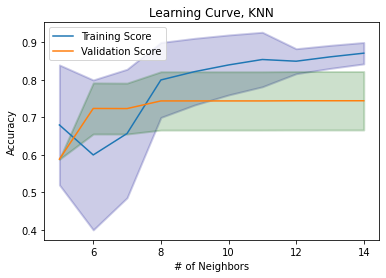

In [25]:
#learning curve
from sklearn.model_selection import learning_curve

n_neighbors_list = range(3, 15)

ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator = neighbors.KNeighborsClassifier(metric='l1', n_jobs=4), 
                                                   X = X_train, y = Y_train, 
                                                   train_sizes = n_neighbors_list, 
                                                   scoring = 'accuracy', 
                                                   n_jobs= -1
                                                   )

train_scores_mean =  train_scores.mean(axis = 1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean =  validation_scores.mean(axis = 1)
validation_scores_std  = validation_scores.std(axis = 1)

xlabel = '# of Neighbors'
ylabel = 'Accuracy'

plt_title = 'Learning Curve, KNN'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(n_neighbors_list, train_scores_mean, label = 'Training Score')
ax.plot(n_neighbors_list, validation_scores_mean, label = 'Validation Score')

plt.fill_between(n_neighbors_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(n_neighbors_list, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)
plt.savefig("results/learning_curve_KNN.jpg", bbox_inches='tight', dpi=200)
plt.show()

## Metrics
Couldn't think of any other mectrics

In [9]:
# confusion metrics
from sklearn.metrics import confusion_matrix

In [26]:
print("Decision Tree:\n", confusion_matrix(y_true=Y_test, y_pred=dt_clf.predict(X_test), normalize='true', labels=[1, 2, 3]))
print("\n\n")
print("NCA Pipeline:\n", confusion_matrix(y_true=Y_test, y_pred=nca_pipe.predict(X_test), normalize='true', labels=[1, 2, 3]))

Decision Tree:
 [[0.9132948  0.06936416 0.01734104]
 [0.31410256 0.53846154 0.1474359 ]
 [0.00929752 0.02892562 0.96177686]]



NCA Pipeline:
 [[0.9132948  0.05780347 0.02890173]
 [0.35897436 0.47435897 0.16666667]
 [0.02169421 0.02995868 0.94834711]]


## Validation Curve